# project of "Exploratory Data Analysis" on Insurance Dataset and Cost.
In this project, we attempt to analyze and explore a dataset for medical costs in Health Insurance in USA in order to derive valuable insights

# Domain: Health Insurance


## Data Description:
this dataset is available on kaggle

The data contains medical costs of people characterized by certain attributes


## Attribute Information:
age: Age of primary beneficiary

sex: Insurance contractor gender, female / male


bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg /  m2 ) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents


smoker: Smoker / Non - smoker


region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


charges: Individual medical costs billed by health insurance.


In [1]:
#Importing the Libraries:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("insurance-data.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data should consist of 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type (Strings in the column)

In [6]:
# Let's check out individual columns:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Data Cleaning:

In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There are No missing vaues in the dataset

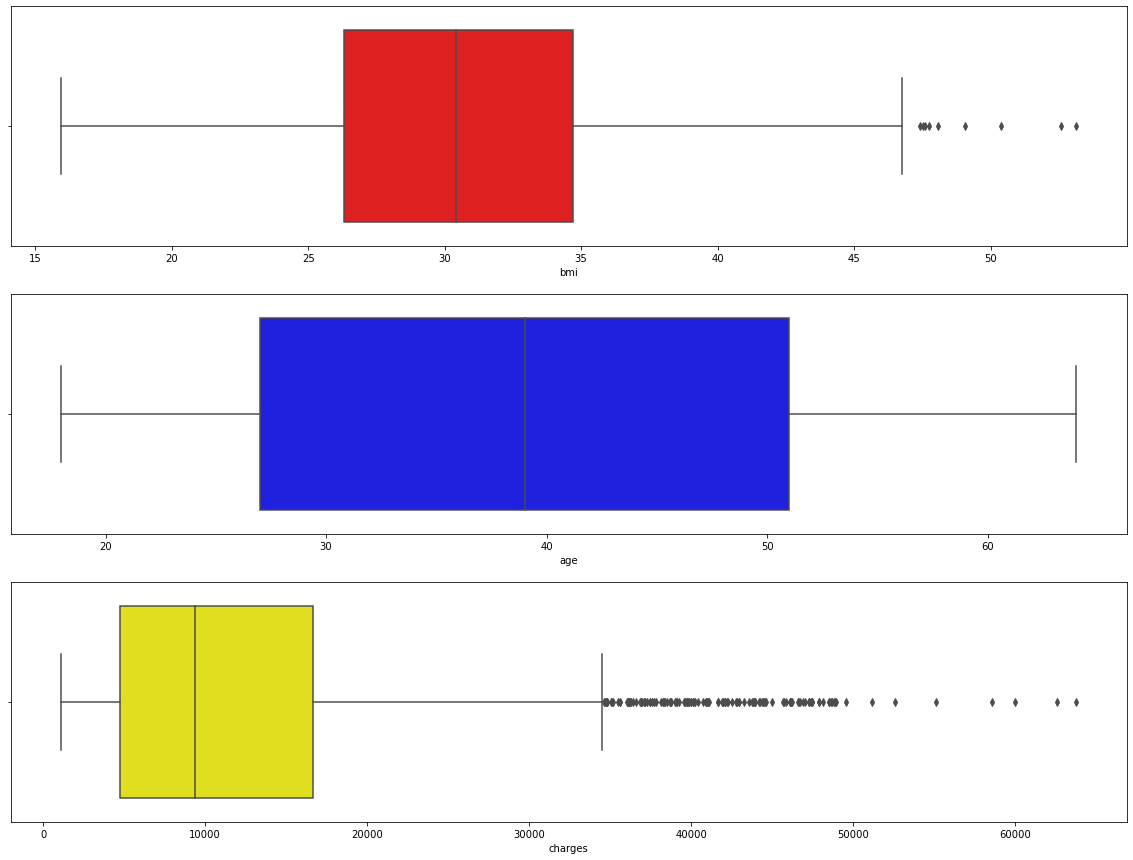

In [9]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='yellow')

plt.show()

bmi has a few extreme values.

charges is highly skewed, there are quiet a lot of extreme values.

C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

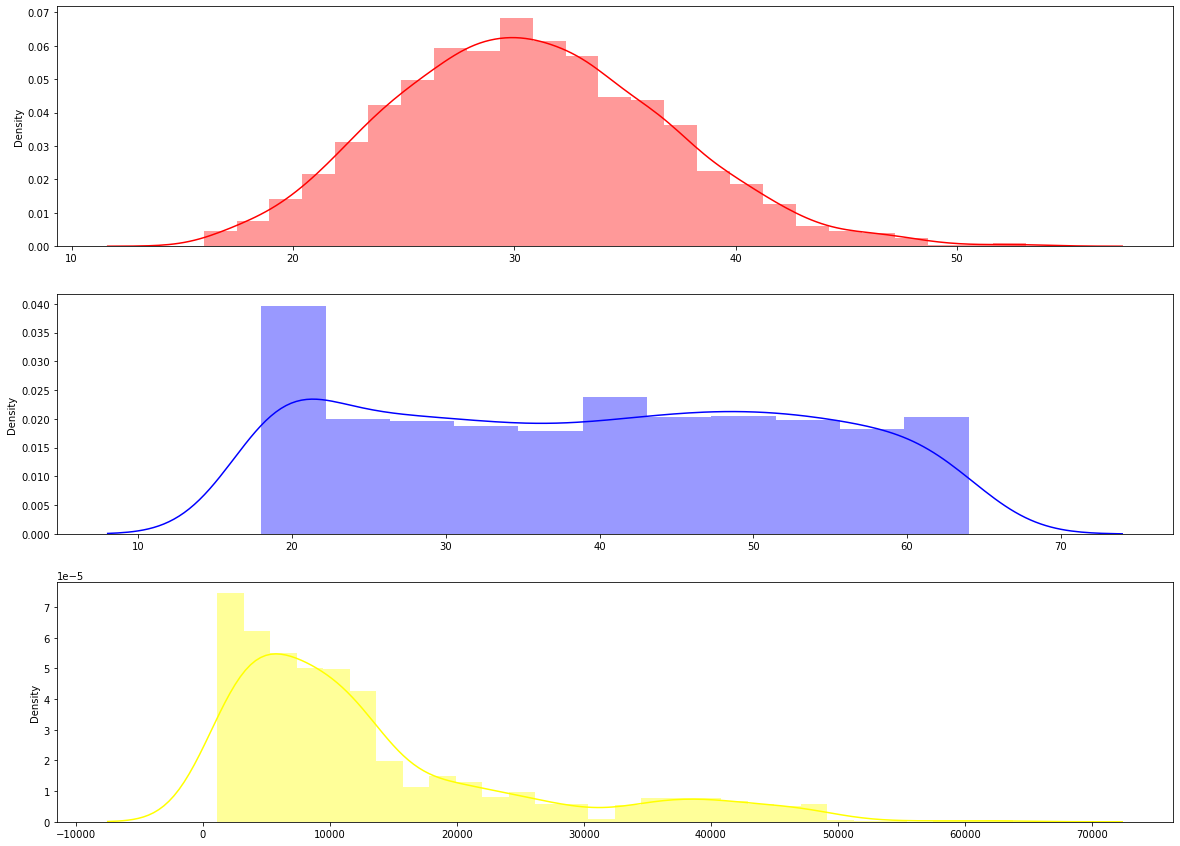

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.distplot(x= df.bmi, color='red')

plt.subplot(3,1,2)
sns.distplot(x= df.age, color='blue')

plt.subplot(3,1,3)
sns.distplot(x= df.charges, color='yellow')

plt.show()

bmi has a few extreme values.

age is uniformly distributed

charges is highly skewed(right), there are quiet a lot of extreme values.

<AxesSubplot:xlabel='sex', ylabel='count'>

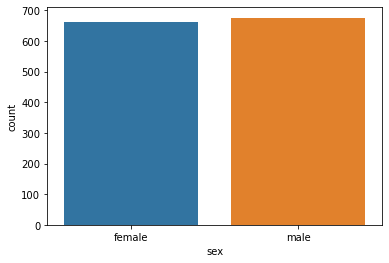

In [11]:
sns.countplot(x = 'sex', data = df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

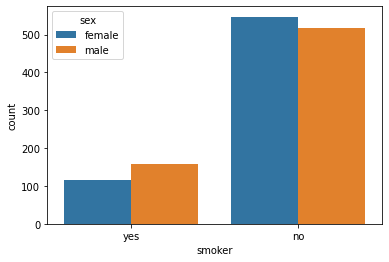

In [12]:
sns.countplot(x = 'smoker', hue = 'sex', data = df)

In [16]:
# a brief summary for the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


All the statistics seem reasonable.

Age column: data looks representative of the true age distribution of the adult population with (39) mean.

Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

## visual methods to analyze the data.

In [18]:

print("Do charges of people who smoke differ significantly from the people who don't?")
df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

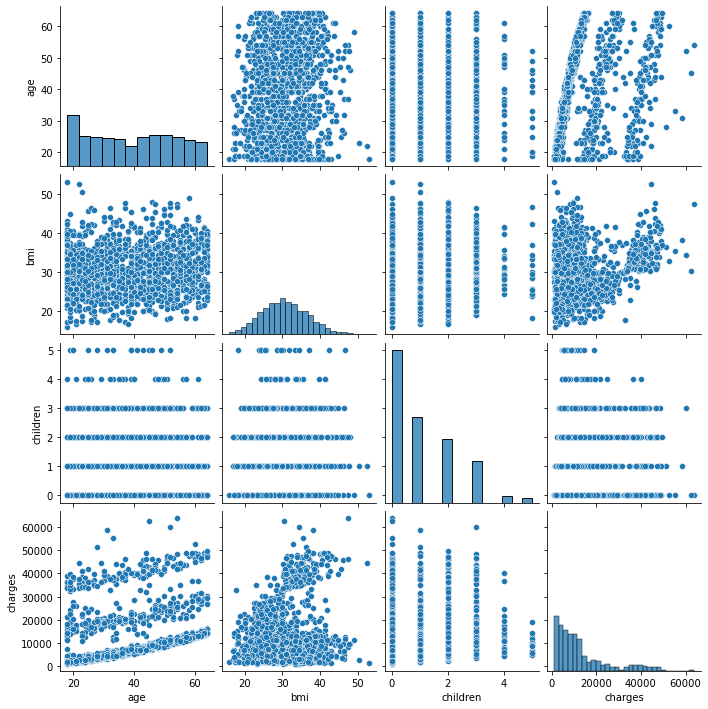

In [22]:
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])



The plot between ‘age’ and ‘bmi’ does not indicate any relationship between them. The plot is more like a cloud and lacks direction. Between ‘age’ and ‘charges’, there is no clear relationship, though there seem to be 3 lines of positive relationship between them. It means, there are 3 sets of charges which increase gradually with age. No clear relation between ‘age’ and ‘children’ either.

The range of ‘bmi’ decreases as children increases, however there are some extreme values in ‘bmi’ for children value 5.

There is a little positive relation between ‘bmi’ and ‘charges’, although the plot is a cloud on initial values of ‘charges’. The range of ‘charges’ decreases as the value of ‘children’ increases.



C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


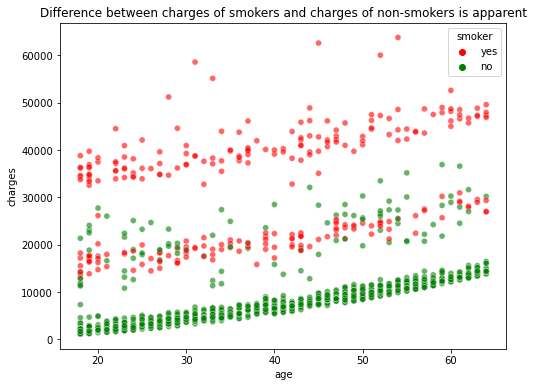

In [19]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages

plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

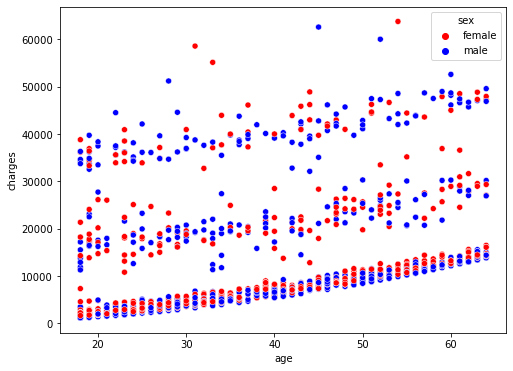

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['red','blue'] )

People who smoke have high charges and the people who do not smoke have considerably very low charges. So, charges do differ for people who smoke from the people who do not smoke 


also people with more age are also have slightly high charges

Charges for both male and female are almost same



C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='sex'>

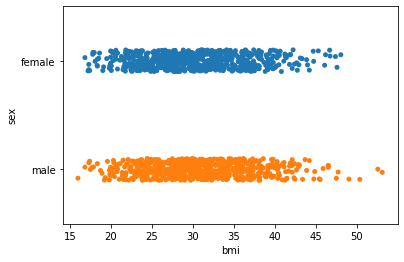

In [34]:
#Does ‘bmi’ of males differ significantly from that of females?

sns.stripplot(df['bmi'], df['sex'])



There is no significant difference in BMI for male and female genders, so no relationship exists between the two.



C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='children'>

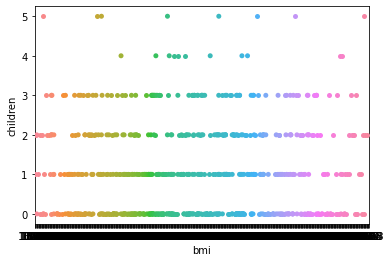

In [36]:
#Is the distribution of ‘bmi’ across women with no children, one child and two children, the same?

sns.stripplot(df['bmi'], df[df['sex']=='female']['children'])



Yes, the distributions of ‘bmi’ are nearly same across women with 0, 1 or 2 children.



In [32]:
#Is the proportion of smokers significantly different in different genders

print("Total count of smokers is ", df[df['smoker']=='yes'].shape[0]) 
print("Total count of male smokers is ", df[df['smoker']=='yes'][df['sex']=='male'].shape[0])
print("Total count of female smokers is ", df[df['smoker']=='yes'][df['sex']=='female'].shape[0]) 
print("Proportion of smokers who are male is ", (df[df['smoker']=='yes'][df['sex']=='male'].shape[0])/df[df['smoker']=='yes'].shape[0]) 
print("Proportion of smokers who are female is ", (df[df['smoker']=='yes'][df['sex']=='female'].shape[0])/df[df['smoker']=='yes'].shape[0])



Total count of smokers is  274
Total count of male smokers is  159
Total count of female smokers is  115
Proportion of smokers who are male is  0.5802919708029197
Proportion of smokers who are female is  0.4197080291970803


<ipython-input-32-80f719a45a8b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Total count of male smokers is ", df[df['smoker']=='yes'][df['sex']=='male'].shape[0])
<ipython-input-32-80f719a45a8b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Total count of female smokers is ", df[df['smoker']=='yes'][df['sex']=='female'].shape[0])
<ipython-input-32-80f719a45a8b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Proportion of smokers who are male is ", (df[df['smoker']=='yes'][df['sex']=='male'].shape[0])/df[df['smoker']=='yes'].shape[0])
<ipython-input-32-80f719a45a8b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Proportion of smokers who are female is ", (df[df['smoker']=='yes'][df['sex']=='female'].shape[0])/df[df['smoker']=='yes'].shape[0])


The proportions being 58% and 42% for male and female genders who smoke are different but not significantly

